In [1]:
import pandas as pd
import numpy as np
from Class_Network import *
import matplotlib.pylab as plt

In [2]:
"""
data can be found on https://archive.ics.uci.edu/ml/datasets/banknote+authentication

Columns:
1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

"""
df = pd.read_csv("data_banknote_authentication.txt",header=None)

In [3]:
df

,0,1,2,3,4
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [4]:
# 5 Classes in 8-Dimensional Space
np.random.seed(15)
noise = 0.1
InputClasses = np.array([[1,0,1,0,0,1,1,0],
                         [0,1,0,1,0,1,0,1],
                         [0,1,1,0,1,0,0,1],
                         [1,0,0,0,1,0,1,1],
                         [1,0,0,1,0,1,0,1]], dtype=float)
OutputClasses = np.array([[1,0,0,0,0],
                          [0,1,0,0,0],
                          [0,0,1,0,0],
                          [0,0,0,1,0],
                          [0,0,0,0,1]], dtype=float)
n_input = np.shape(InputClasses)[1]
n_output = np.shape(OutputClasses)[1]
n_classes = np.shape(InputClasses)[0]

# Create a training dataset
n_samples = 100
training_output = []
training_input = []
for idx in range(n_samples):
    k = np.random.randint(n_classes)
    x = InputClasses[k,:] + np.random.normal(size=n_input)*noise
    t = OutputClasses[k,:]
    training_input.append(x)
    training_output.append(t)

# Create a test dataset
n_samples = 100
test_output = []
test_input = []
for idx in range(n_samples):
    k = np.random.randint(n_classes)
    x = InputClasses[k,:] + np.random.normal(size=n_input)*noise
    t = OutputClasses[k,:]
    test_input.append(x)
    test_output.append(t)

train = [np.array(training_input), np.array(training_output)]
test = [np.array(test_input), np.array(test_output)]

In [5]:
net = Network([n_input, 6, n_output], type='classifier', prior_dist_weight = ['gaussian','gaussian'], prior_dist_bias = ['gaussian', 'gaussian','gaussian'])



In [6]:
# Evaluate it before training
CE = net.Evaluate(train[0], train[1])
accuracy = net.ClassificationAccuracy(train[0], train[1])
print('Cross Entropy = '+str(CE))
print('     Accuracy = '+str(accuracy*100.)+'%')

Cross Entropy = 4.322514137459869
     Accuracy = 9.999999999999998%


In [7]:
net.Learn(train[0], train[1], epochs=200, lrate=1, times = 100, progress=True)

In [8]:
print(net.lyr[2].bias_vector.mu)
print(net.lyr[2].bias_vector.sigma)
print(net.weight_matrix[1].mu)
print(net.weight_matrix[1].sigma)

[[-4.97668001 -2.80582666 -2.56965475  0.29427535 -1.72370318]]
[[1. 1. 1. 1. 1.]]
[[-3.75473117 -0.92864099  1.01475624 -3.3143156  -0.6896731 ]
 [ 4.52107172 -3.31180119 -2.9878376   2.00679062 -5.4157414 ]
 [-1.55373065 -2.31413216  5.14198336 -2.2827437  -4.15739924]
 [ 2.53778549 -0.29491053  1.30654111  1.76515144 -0.56350854]
 [ 2.83479985 -0.63997115 -2.76223367 -5.3665461   4.09994401]
 [-0.67176514  4.72600201 -0.72524531 -4.1138244  -2.00913648]]
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [9]:
net.weight_matrix[0].mu

array([[-2.14822447e+00,  1.48553965e-01, -3.28561726e+00,
        -1.02809426e+00,  2.39098055e+00, -4.24733140e+00],
       [ 1.88735393e-01, -5.07399312e+00,  2.28788921e+00,
        -3.27234289e+00, -4.30670251e+00,  3.90876472e+00],
       [ 1.58187881e+00,  2.76686736e+00,  3.67075692e+00,
        -1.77992544e+00,  2.64940084e+00, -8.56468706e-01],
       [ 5.04581712e-01, -5.25208453e+00, -4.10016848e+00,
        -2.96073648e+00,  4.61356914e-01,  2.62779784e+00],
       [ 1.63060075e+00, -1.09539254e+00,  2.40603532e+00,
        -5.09771039e-03, -3.65243231e+00, -2.64348168e+00],
       [-1.96875451e+00,  3.72806838e-01, -4.24471260e+00,
        -6.89889507e-01,  4.99774828e+00,  6.11857166e-01],
       [-4.83824781e+00,  2.67841347e+00, -3.08718830e+00,
        -1.14351831e+00, -2.82109029e+00,  9.43880776e-01],
       [ 3.19733187e-01, -2.00733551e+00, -9.49564230e-01,
         2.64805287e-01, -3.50831551e+00, -2.61310908e+00]])

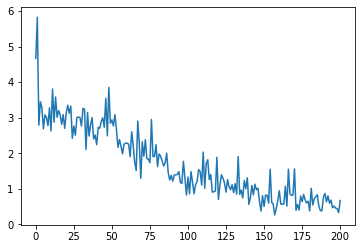

In [10]:
plt.plot(net.cost_history);

In [15]:
print('Training Set')
CE = net.Evaluate(train[0], train[1])
accuracy = net.ClassificationAccuracy(train[0], train[1])
print('Cross Entropy = '+str(CE))
print('     Accuracy = '+str(accuracy*100.)+'%')

Training Set
Cross Entropy = 0.3368739032306467
     Accuracy = 100.0%


In [24]:
print('Test Set')
CE = net.Evaluate(test[0], test[1])
accuracy = net.ClassificationAccuracy(test[0], test[1])
print('Cross Entropy = '+str(CE))
print('     Accuracy = '+str(accuracy*100.)+'%')

Test Set
Cross Entropy = 0.4027735010561046
     Accuracy = 98.0%
